Lab 2.3 Image Histogram Matching

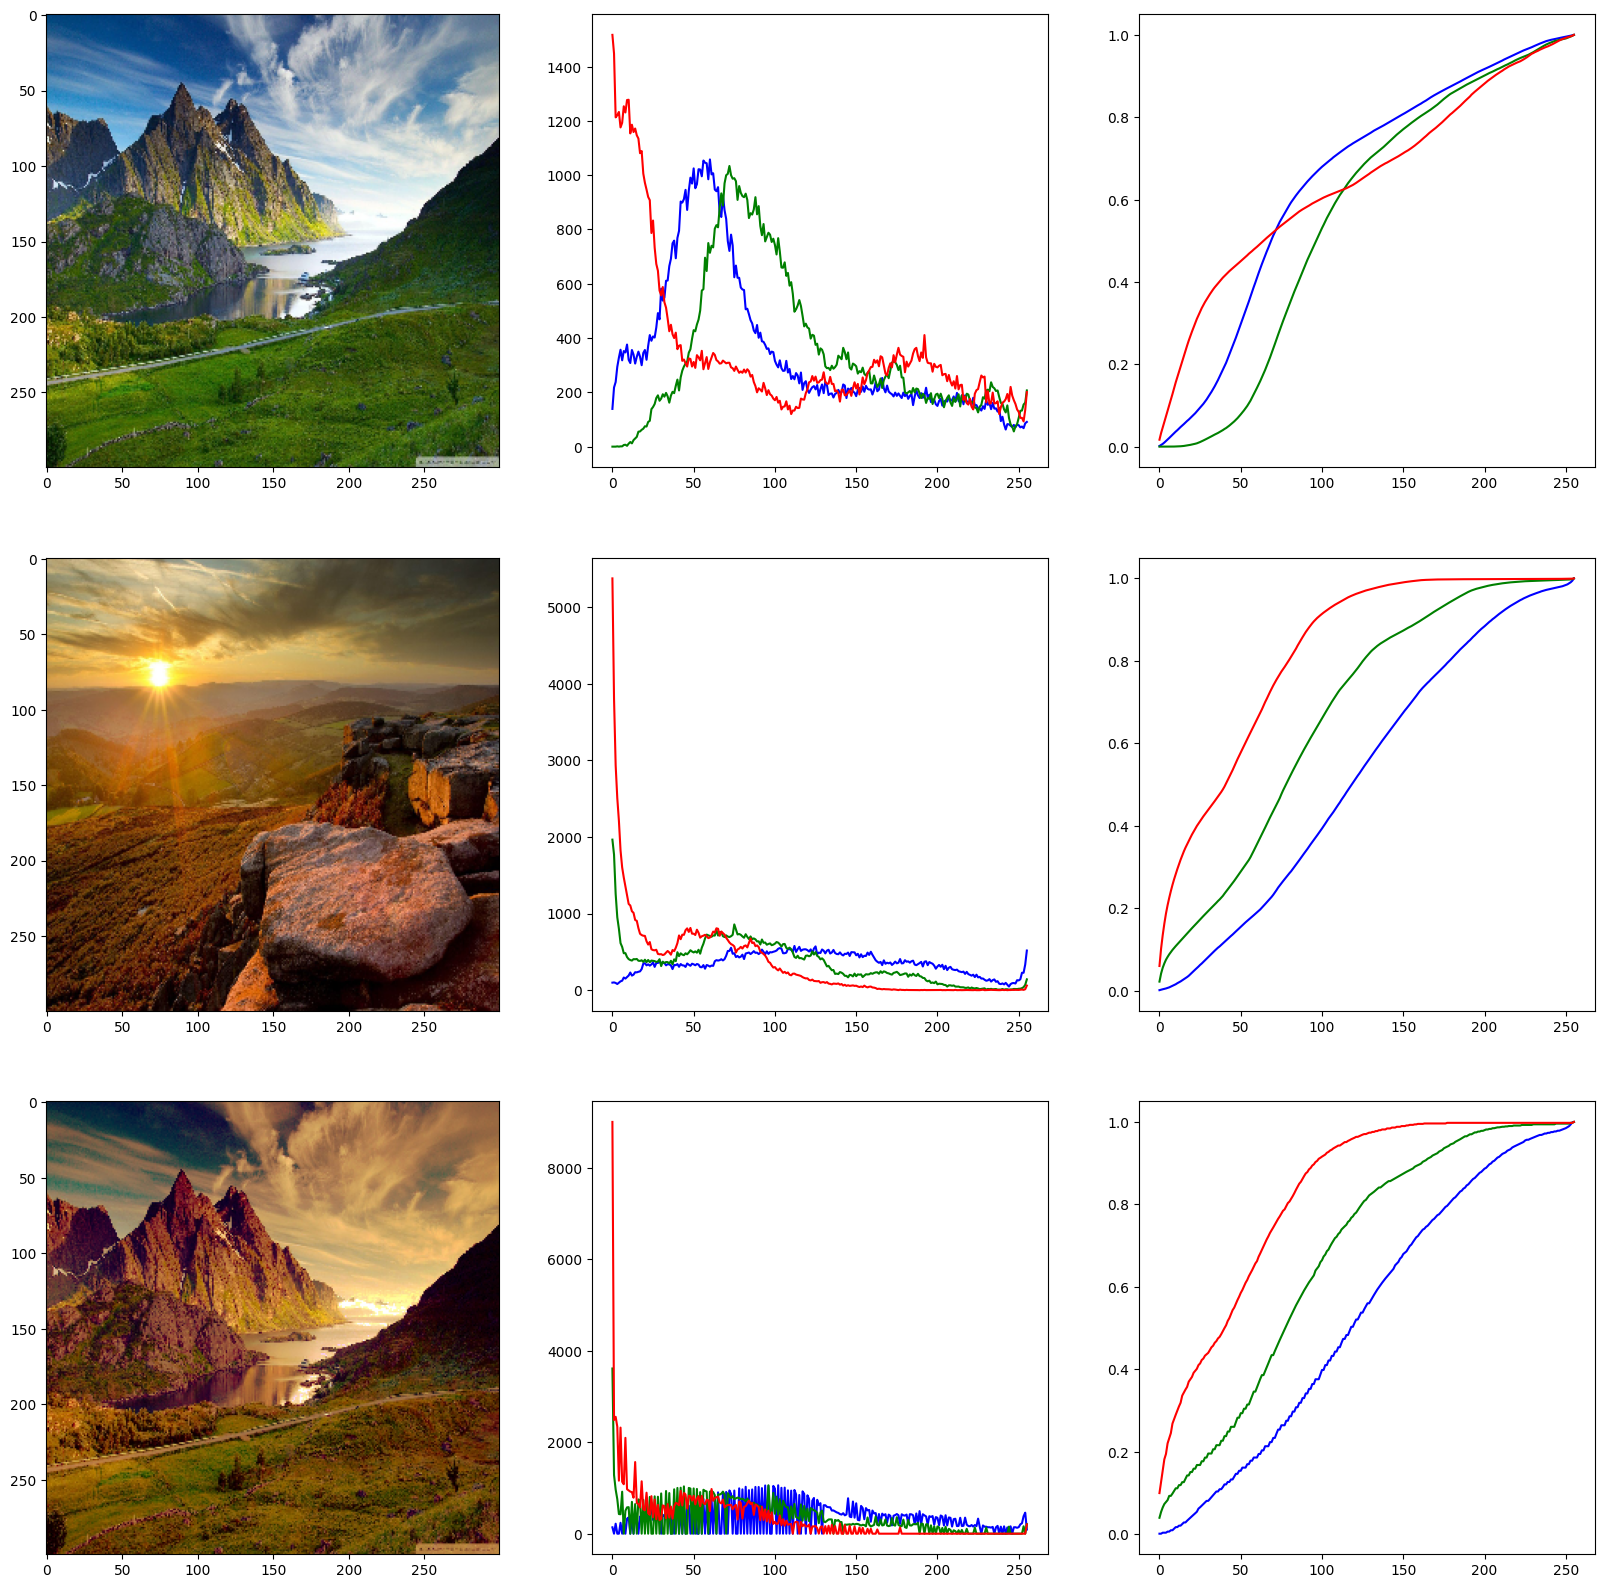

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage.io import imread
from skimage.exposure import cumulative_distribution

img1 = cv2.imread('1.jpg',)
img1_resized = cv2.resize(img1, (300, 300))
img1_resized = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('2.jpg')
img2_resized = cv2.resize(img2, (300, 300))
img2_resized = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

pixels = np.arange(256)

img1b, img1g, img1r = cv2.split(img1_resized)
img2b, img2g, img2r = cv2.split(img2_resized)

def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

def histogram_match(cdfINP, cdfTEMP, imageINP):
    pix = np.interp(cdfINP, cdfTEMP, pixels)
    imageMATCH = (np.reshape(pix[imageINP.ravel()], imageINP.shape)).astype(np.uint8)
    return imageMATCH

rows = 3
cols = 3

fig = plt.figure(figsize=(20, 20))
plt.subplot(rows, cols, 1)
plt.imshow(img1_resized)

for i, j in enumerate("bgr"):
    histogram = cv2.calcHist([img1_resized], [i], None, [256], [0, 256])
    cdf1 = np.cumsum(histogram) / sum(histogram)
    plt.subplot(rows, cols, 2)
    plt.plot(histogram, j)
    plt.subplot(rows, cols, 3)
    plt.plot(cdf1, j)

plt.subplot(rows, cols, 4)
plt.imshow(img2_resized)

for i, j in enumerate("bgr"):
    histogram = cv2.calcHist([img2_resized], [i], None, [256], [0, 256])
    cdf2 = np.cumsum(histogram) / sum(histogram)
    plt.subplot(rows, cols, 5)
    plt.plot(histogram, j)
    plt.subplot(rows, cols, 6)
    plt.plot(cdf2, j)

image_result = np.zeros(img1_resized.shape, dtype=np.uint8)

for i in range(3):
    cdfINP = getCDF(img1_resized[:, :, i])
    cdfTEMP = getCDF(img2_resized[:, :, i])
    image_result[:, :, i] = histogram_match(cdfINP, cdfTEMP, img1_resized[:, :, i])

plt.subplot(rows, cols, 7)
plt.imshow(image_result)

for i, j in enumerate("bgr"):
    histogram = cv2.calcHist([image_result], [i], None, [256], [0, 256])
    cdf1 = np.cumsum(histogram) / sum(histogram)
    plt.subplot(rows, cols, 8)
    plt.plot(histogram, j)
    plt.subplot(rows, cols, 9)
    plt.plot(cdf1, j)

plt.show()
